In [1]:
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
r_t = [0.1*np.random.normal()]
for _ in range(100):
    r_t.append(0.5*r_t[-1] + 0.1*np.random.normal())

In [6]:
# build p_t that is granger caused by r_t, i.e., p_t = r_t + c
p_t = [item + 0.1*np.random.normal() for item in r_t]

In [7]:
# shifting T.S by 3 months, p_t shifted 3 months into the future
r_t = r_t[3:]
p_t = p_t[:-3]

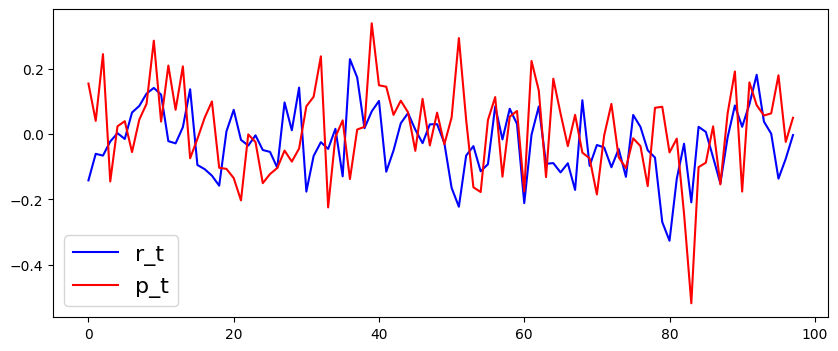

In [8]:
plt.figure(figsize=(10,4))
plt.plot(r_t, color='b')
plt.plot(p_t, color='r')
plt.legend(['r_t', 'p_t'], fontsize=16)


In [15]:
# Create df and columnize variables such that col 1 granger causes col 0
ts_df = pd.DataFrame(columns=['p_t', 'r_t'], data=zip(p_t,r_t)) # r_t granger causes p_t

In [16]:
ts_df

,p_t,r_t
0,0.154722,-0.141549
1,0.040490,-0.060354
2,0.244812,-0.065734
3,-0.144959,-0.022628
4,0.024039,0.002864
...,...,...
93,0.056876,0.038190
94,0.063477,0.001286
95,0.179920,-0.136335
96,-0.023814,-0.075539


In [19]:
gc_res = grangercausalitytests(ts_df, 3) # check max of 3 lags


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0842  , p=0.7723  , df_denom=94, df_num=1
ssr based chi2 test:   chi2=0.0869  , p=0.7681  , df=1
likelihood ratio test: chi2=0.0869  , p=0.7682  , df=1
parameter F test:         F=0.0842  , p=0.7723  , df_denom=94, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.5799  , p=0.0319  , df_denom=91, df_num=2
ssr based chi2 test:   chi2=7.5532  , p=0.0229  , df=2
likelihood ratio test: chi2=7.2708  , p=0.0264  , df=2
parameter F test:         F=3.5799  , p=0.0319  , df_denom=91, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=31.6381 , p=0.0000  , df_denom=88, df_num=3
ssr based chi2 test:   chi2=102.4643, p=0.0000  , df=3
likelihood ratio test: chi2=69.5097 , p=0.0000  , df=3
parameter F test:         F=31.6381 , p=0.0000  , df_denom=88, df_num=3


Looking at 3 lags, since the p-value is less than 0.05, we reject the null hypothesis that r_t does not Granger cause p_t.                                                  
We strong evidence that r_t granger causes p_t by looking at 3 lags